# 0. Import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import gzip
import json
from tqdm import tqdm
import os
from collections import Counter
from datetime import datetime
import math
tqdm.pandas() #for progres_apply etc.

In [2]:
#read file line-by-line and parse json, returns dataframe
def parse_json(filename_gzipped_python_json, read_max=-1):
  #read gzipped content
  f=gzip.open(filename_gzipped_python_json,'r')
  
  #parse json
  parse_data = []
  for line in tqdm(f): #tqdm is for showing progress bar, always good when processing large amounts of data
    line = line.decode('utf-8')
    line = line.replace('true','True') #difference json/python
    line = line.replace('false','False')
    parsed_result = eval(line) #load python nested datastructure
    parse_data.append(parsed_result)
    if read_max !=-1 and len(parse_data) > read_max:
      print(f'Break reading after {read_max} records')
      break
  print(f"Reading {len(parse_data)} rows.")

  #create dataframe
  df= pd.DataFrame.from_dict(parse_data)
  return df

# 1. Load Steam data

In [3]:
steam_path = 'data/'
metadata_games = 'steam_games.json.gz' 
user_items = 'australian_users_items.json.gz'
user_reviews = 'australian_user_reviews.json.gz'
game_bundles = 'bundle_data.json.gz'
steam_reviews= 'steam_reviews.json.gz'

In [4]:
dataframes = []
for dataset in [ user_reviews, steam_reviews]:
# for dataset in [ metadata_games, user_items, user_reviews, game_bundles, steam_reviews]:
  print(f"----- {dataset}-----")
  size = os.path.getsize(steam_path + dataset) 
  print(f'Size of file is {size / 1000000}MB')
  df_metadata = parse_json(steam_path + dataset)
  dataframes.append(df_metadata)
  pd.set_option('display.max_colwidth', None)
  display(df_metadata.head(2))
  #display(df_metadata.describe(include='all'))

----- australian_user_reviews.json.gz-----
Size of file is 6.940139MB


25799it [00:02, 10857.03it/s]


Reading 25799 rows.


,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'It's unique and worth a playthrough.'}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]"
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what True fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}, {'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', 'recommend': True, 'review': 'For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it.'}, {'funny': '', 'posted': 'Posted November 29, 2013.', 'last_edited': '', 'item_id': '239030', 'helpful': '1 of 4 people (25%) found this review helpful', 'recommend': True, 'review': 'Very fun little game to play when your bored or as a time passer. Very gud. Do Recommend. pls buy'}]"


----- steam_reviews.json.gz-----
Size of file is 1350.067901MB


7793069it [05:03, 25712.42it/s]


Reading 7793069 rows.


,username,product_id,page_order,text,hours,recommended,products,date,early_access,page,compensation,found_funny,user_id
0,Chaos Syren,725280,0,This would not be acceptable as an entertainment even back in the day when these graphics were all there was to be had. No effort has been made to bring the player into any story or even entertain.,0.1,True,41.0,2017-12-17,False,1,NaN,NaN,NaN
1,₮ʜᴇ Wᴀʀᴛᴏɴ,328100,0,looks like a facebook game,51.1,True,769.0,2017-12-27,False,1,NaN,NaN,NaN


In [5]:
user_reviews_df = dataframes[0]
user_reviews_df = user_reviews_df.explode("reviews").reset_index(drop=True)
user_reviews_df

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}"
1,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'It's unique and worth a playthrough.'}"
2,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}"
3,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what True fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}"
4,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', 'recommend': True, 'review': 'For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it.'}"
...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'last_edited': '', 'item_id': '70', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'a must have classic from steam definitely worth buying.'}"
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'last_edited': '', 'item_id': '362890', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.'}"
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', 'posted': 'Posted July 3.', 'last_edited': '', 'item_id': '273110', 'helpful': '1 of 2 people (50%) found this review helpful', 'recomm

In [6]:
user_reviews_df = pd.concat([user_reviews_df.drop(['reviews'], axis=1), user_reviews_df['reviews'].progress_apply(pd.Series)], axis=1)
user_reviews_df

100%|███████████████████████████████████| 59333/59333 [00:17<00:00, 3480.69it/s]


,user_id,user_url,0,funny,helpful,item_id,last_edited,posted,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,NaN,,No ratings yet,1250,,"Posted November 5, 2011.",True,"Simple yet with great replayability. In my opinion does ""zombie"" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth ""zombie"" splattering fun for the whole family. Amazed this sort of FPS is so rare."
1,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,NaN,,No ratings yet,22200,,"Posted July 15, 2011.",True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970982479,NaN,,No ratings yet,43110,,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!
3,js41637,http://steamcommunity.com/id/js41637,NaN,,15 of 20 people (75%) found this review helpful,251610,,"Posted June 24, 2014.",True,"I know what you think when you see this title ""Barbie Dreamhouse Party"" but do not be intimidated by it's title, this is easily one of my GOTYs. You don't get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can't 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what True fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8"
4,js41637,http://steamcommunity.com/id/js41637,NaN,,0 of 1 people (0%) found this review helpful,227300,,"Posted September 8, 2013.",True,"For a simple (it's actually not all that simple but it can be!) truck driving Simulator, it is quite a fun and relaxing game. Playing on simple (or easy?) its just the basic WASD keys for driving but (if you want) the game can be much harder and realistic with having to manually change gears, much harder turning, etc. And reversing in this game is a ♥♥♥♥♥, as I imagine it would be with an actual truck. Luckily, you don't have to reverse park it but you get extra points if you do cause it is bloody hard. But this is suprisingly a nice truck driving game and I had a bit of fun with it."
...,...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,NaN,,No ratings yet,70,,Posted July 10.,True,a must have classic from steam definitely worth buying.
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312638244,NaN,,No ratings yet,362890,,Posted July 8.,True,this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,1 person found this review funny,1 of 2 people (50%) found this review helpful,273110,,Posted July 3.,True,had so much fun plaing this and collecting resources xD we won on my first try and killed final boss!
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,,No ratings yet,730,,Posted July 20.,True,:D


In [7]:
#user_reviews_df.loc[user_reviews_df['recommend'] == False]
user_reviews_df = user_reviews_df[["user_id", "item_id", "recommend"]]
user_reviews_df

,user_id,item_id,recommend
0,76561197970982479,1250,True
1,76561197970982479,22200,True
2,76561197970982479,43110,True
3,js41637,251610,True
4,js41637,227300,True
...,...,...,...
59328,76561198312638244,70,True
59329,76561198312638244,362890,True
59330,LydiaMorley,273110,True
59331,LydiaMorley,730,True


In [8]:
steam_reviews_df = dataframes[1]
steam_reviews_df = steam_reviews_df[["user_id", "product_id", "recommended"]]
steam_reviews_df = steam_reviews_df.rename(columns={'product_id': "item_id", "recommended": 'recommend'})
steam_reviews_df

,user_id,item_id,recommend
0,NaN,725280,True
1,NaN,328100,True
2,NaN,328100,True
3,NaN,35140,True
4,76561198007483075,35140,True
...,...,...,...
7793064,NaN,252490,True
7793065,76561198089897928,252490,True
7793066,76561198048207033,252490,True
7793067,NaN,252490,True


In [9]:
# df = user_reviews_df.append(steam_reviews_df)
interactions_df = steam_reviews_df
interactions_df = interactions_df.dropna()
interactions_df

,user_id,item_id,recommend
4,76561198007483075,35140,True
8,76561197970402776,707610,True
11,76561198060686749,328100,True
13,76561198023491401,35140,True
16,76561198115331805,35140,True
...,...,...,...
7793058,76561197962161824,252490,True
7793061,76561198010660367,252490,True
7793062,76561197983773018,252490,True
7793065,76561198089897928,252490,True


In [10]:
import pickle
pickle.dump(interactions_df, open("interactions_df.p", "wb"))

In [11]:
import pickle
interactions_df = pickle.load(open("interactions_df.p", "rb"))

# 4. Pre-process interactions
- Drop reconsumption items
- Remove items with fewer than x interactions
- Remove users with fewer than x interactions

In [12]:
def preprocess_classic(df, minsup=20):
  """
  Goal: - Remove reconsumption items
        - Remove items that have less than minsup interactions
        - Remove users that have less than minsup interactions

  :input df: Dataframe containing user_id, item_id and time
  """
  before = df.shape[0]
  #drop reconsumption items
  df = df.drop_duplicates(subset=["user_id","item_id"])
  print("After drop_duplicates (reconsumption items): {} -> {}".format(before,df.shape[0]))
  #compute item/user counts
  g1 = df.groupby('item_id', as_index=False)['user_id'].size() # nr of users interacted with item
  g1 = g1.rename({'size': 'count_item'}, axis='columns')
  g2 = df.groupby('user_id', as_index=False)['item_id'].size() # nr of items user interacted with
  g2 = g2.rename({'size': 'count_user'}, axis='columns')
  df = pd.merge(df, g1, how='left', on=['item_id'])
  df = pd.merge(df, g2, how='left', on=['user_id'])
  display(df.head(5))
  #drop items occurring less than minsup times
  before = df.shape[0]
  df = df[df['count_item'] >= minsup]
  print("After dropping items with less than {} interactions: {} -> {}".format(minsup, before,df.shape[0]))
  before = df.shape[0]
  #drop users with less then minsup items in history
  df = df[df['count_user'] >= minsup]
  df = df[['user_id','item_id', "recommend"]]
  print("After dropping users with less than {} interactions: {} -> {}".format(minsup, before,df.shape[0]))
  return df

#Remark: ignoring rating, considering all reviews as implicit possitive feedback
#print number of users and items
interactions_df_processed = interactions_df[['user_id','item_id', "recommend"]]
print(f"number of unique users: {interactions_df_processed['user_id'].nunique()}")
print(f"number of unique items: {interactions_df_processed['item_id'].nunique()}")
interactions_df_processed = preprocess_classic(interactions_df_processed)
display(interactions_df_processed.head(5))
print(f"number of unique users: {interactions_df_processed['user_id'].nunique()}")
print(f"number of unique items: {interactions_df_processed['item_id'].nunique()}")

number of unique users: 1485611
number of unique items: 14513
After drop_duplicates (reconsumption items): 3176223 -> 2832522


,user_id,item_id,recommend,count_item,count_user
0,76561198007483075,35140,True,3173,6
1,76561197970402776,707610,True,1,7
2,76561198060686749,328100,True,22,55
3,76561198023491401,35140,True,3173,109
4,76561198115331805,35140,True,3173,1


After dropping items with less than 20 interactions: 2832522 -> 2781696
After dropping users with less than 20 interactions: 2781696 -> 222710


,user_id,item_id,recommend
2,76561198060686749,328100,True
3,76561198023491401,35140,True
7,76561198011965365,328100,True
16,76561198073092169,365560,True
17,76561198241244626,363520,True


number of unique users: 6538
number of unique items: 6418


In [13]:
interactions_df_processed

,user_id,item_id,recommend
2,76561198060686749,328100,True
3,76561198023491401,35140,True
7,76561198011965365,328100,True
16,76561198073092169,365560,True
17,76561198241244626,363520,True
...,...,...,...
2831970,76561197968560421,252490,True
2832151,76561198081656991,252490,True
2832201,76561198004431735,252490,True
2832238,76561198025394635,252490,True


In [14]:
dct = {}
def map_to_consecutive_id(uuid):
  if uuid in dct:
    return dct[uuid]
  else:
    id = len(dct)
    dct[uuid] = id
    return id

#1) convert user user_ids to consecutive integer ID's
interactions_df_processed['user_id_int'] = interactions_df_processed['user_id'].progress_apply(map_to_consecutive_id)

#2) convert item_ids to to consecutive integer ID's
dct.clear()
interactions_df_processed['item_id_int'] = interactions_df_processed['item_id'].progress_apply(map_to_consecutive_id)

interactions_df_processed.head()

interactions_df_processed = interactions_df_processed[["user_id_int", "item_id_int", "recommend"]]
interactions_df_processed = interactions_df_processed.rename(columns={"item_id_int": "item_id", "user_id_int": "user_id"})
interactions_df_processed

100%|██████████████████████████████| 222710/222710 [00:00<00:00, 1269060.35it/s]


,user_id,item_id,recommend
2,0,0,True
3,1,1,True
7,2,0,True
16,3,2,True
17,4,3,True
...,...,...,...
2831970,3415,6191,True
2832151,5867,6191,True
2832201,3561,6191,True
2832238,3086,6191,True


In [15]:
import pickle
pickle.dump(interactions_df_processed, open("interactions.p", "wb"))

In [16]:
import pickle
interactions_df_processed = pickle.load(open("interactions.p", "rb"))

# 5. Create train/test split
Different options:
- **Time-based split**, i.e. split interactions before/after certain date. Keep all users with both training and test interactions for evaluations. Repeat for different train/test window, i.e. repeat for a number of key dates.
- **Session-based split**, i.e. split and keep first $x$ interactions for training and $|I_u| - x$  for testing, where $I_u = {i_1,\ldots,i_k}$ represents the user's history sorted on time
- **Random**, i.e. take $x$ random items for training and $|I_u| -x$ for testing
- **Leave-one-out**, i.e. take last (or random) item for testing

Additionaly, use techniques such as cross-validation and create multiple train/test splits and report both average and standard deviation.

In [17]:
#Session-based split:
sessions_df = interactions_df_processed.groupby(by='user_id', as_index=False)[['item_id', "recommend"]].agg(list)
display(sessions_df.head(10))

def split(items, percentage_train):
  no_train_items = math.floor(len(items) * percentage_train)
  return items[0:no_train_items], items[no_train_items:]

percentage_train = 0.8
sessions_df['train'] = sessions_df['item_id'].apply(lambda items: split(items, percentage_train)[0])
sessions_df['test'] = sessions_df['item_id'].apply(lambda items: split(items, percentage_train)[1])

sessions_df.head(10)

,user_id,item_id,recommend
0,0,"[0, 66, 340, 486, 582, 85, 702, 1141, 1214, 1269, 1284, 1365, 1404, 1559, 1707, 1879, 1982, 2068, 2449, 2533, 2389, 2618, 2720, 3018, 3082, 3300, 3350, 3640, 3780, 3925, 3983, 4014, 3998, 4497, 4175, 4782, 4894, 5318, 5629, 5794, 5857, 6348]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]"
1,1,"[1, 66, 133, 226, 285, 334, 418, 477, 554, 626, 641, 660, 696, 777, 860, 863, 865, 953, 995, 1073, 1129, 1150, 1180, 1183, 1259, 1291, 1394, 1399, 1416, 1427, 1658, 1674, 1698, 1730, 1898, 2011, 2127, 2145, 2161, 2205, 2551, 2579, 2739, 2754, 2763, 2805, 2918, 3082, 3135, 3190, 3224, 3264, 3268, 3419, 3450, 3488, 3542, 3545, 3583, 3860, 3913, 3914, 3940, 3983, 4171, 4272, 4425, 4460, 4466, 4468, 4510, 4540, 4545, 4767, 4921, 4941, 4944, 4993, 5011, 5139, 5209, 5245, 5295, 5331, 5334, 5350, 5402, 5411, 5488, 5521, 5570, 5584, 5600, 5720, 5734, 5744, 5803, 5958, 5978, 5988, ...]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...]"
2,2,"[0, 25, 23, 40, 44, 49, 58, 60, 78, 16, 66, 73, 51, 109, 114, 1, 132, 148, 160, 175, 173, 189, 187, 181, 196, 195, 198, 213, 215, 222, 223, 224, 227, 232, 248, 265, 266, 258, 268, 280, 286, 294, 302, 285, 305, 304, 301, 308, 325, 335, 341, 345, 360, 334, 331, 371, 380, 383, 417, 452, 455, 466, 439, 473, 415, 481, 488, 509, 505, 501, 513, 516, 544, 537, 540, 568, 566, 554, 576, 533, 585, 582, 202, 592, 593, 600, 598, 610, 617, 640, 639, 632, 641, 626, 649, 625, 671, 683, 695, 696, ...]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...]"
3,3,"[2, 27, 39, 30, 69, 83, 101, 122, 142, 143, 147, 154, 159, 165, 166, 174, 179, 215, 202, 257, 277, 290, 333, 341, 347, 351, 364, 375, 391, 407, 410, 420, 418, 434, 446, 453, 552, 575, 601, 604, 613, 649, 658, 687, 699, 700, 716, 720, 735, 737, 765, 780, 799, 812, 815, 813, 809, 842, 853, 880, 893, 899, 923, 930, 957, 982, 1043, 1070, 1096, 1099, 1123, 1128, 1149, 1158, 1162, 1169, 1172, 1199, 1201, 1207, 1235, 1275, 1286, 1305, 1308, 1297, 1323, 1333, 1332, 1347, 1348, 1328, 1371, 1393, 1394, 1397, 1384, 1430, 1459, 1467, ...]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...]"
4,4,"[3, 24, 331, 320

,user_id,item_id,recommend,train,test
0,0,"[0, 66, 340, 486, 582, 85, 702, 1141, 1214, 1269, 1284, 1365, 1404, 1559, 1707, 1879, 1982, 2068, 2449, 2533, 2389, 2618, 2720, 3018, 3082, 3300, 3350, 3640, 3780, 3925, 3983, 4014, 3998, 4497, 4175, 4782, 4894, 5318, 5629, 5794, 5857, 6348]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]","[0, 66, 340, 486, 582, 85, 702, 1141, 1214, 1269, 1284, 1365, 1404, 1559, 1707, 1879, 1982, 2068, 2449, 2533, 2389, 2618, 2720, 3018, 3082, 3300, 3350, 3640, 3780, 3925, 3983, 4014, 3998]","[4497, 4175, 4782, 4894, 5318, 5629, 5794, 5857, 6348]"
1,1,"[1, 66, 133, 226, 285, 334, 418, 477, 554, 626, 641, 660, 696, 777, 860, 863, 865, 953, 995, 1073, 1129, 1150, 1180, 1183, 1259, 1291, 1394, 1399, 1416, 1427, 1658, 1674, 1698, 1730, 1898, 2011, 2127, 2145, 2161, 2205, 2551, 2579, 2739, 2754, 2763, 2805, 2918, 3082, 3135, 3190, 3224, 3264, 3268, 3419, 3450, 3488, 3542, 3545, 3583, 3860, 3913, 3914, 3940, 3983, 4171, 4272, 4425, 4460, 4466, 4468, 4510, 4540, 4545, 4767, 4921, 4941, 4944, 4993, 5011, 5139, 5209, 5245, 5295, 5331, 5334, 5350, 5402, 5411, 5488, 5521, 5570, 5584, 5600, 5720, 5734, 5744, 5803, 5958, 5978, 5988, ...]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...]","[1, 66, 133, 226, 285, 334, 418, 477, 554, 626, 641, 660, 696, 777, 860, 863, 865, 953, 995, 1073, 1129, 1150, 1180, 1183, 1259, 1291, 1394, 1399, 1416, 1427, 1658, 1674, 1698, 1730, 1898, 2011, 2127, 2145, 2161, 2205, 2551, 2579, 2739, 2754, 2763, 2805, 2918, 3082, 3135, 3190, 3224, 3264, 3268, 3419, 3450, 3488, 3542, 3545, 3583, 3860, 3913, 3914, 3940, 3983, 4171, 4272, 4425, 4460, 4466, 4468, 4510, 4540, 4545, 4767, 4921, 4941, 4944, 4993, 5011, 5139, 5209, 5245, 5295, 5331, 5334, 5350, 5402]","[5411, 5488, 5521, 5570, 5584, 5600, 5720, 5734, 5744, 5803, 5958, 5978, 5988, 6048, 6060, 6064, 6151, 6198, 6216, 6267, 6330, 6363]"
2,2,"[0, 25, 23, 40, 44, 49, 58, 60, 78, 16, 66, 73, 51, 109, 114, 1, 132, 148, 160, 175, 173, 189, 187, 181, 196, 195, 198, 213, 215, 222, 223, 224, 227, 232, 248, 265, 266, 258, 268, 280, 286, 294, 302, 285, 305, 304, 301, 308, 325, 335, 341, 345, 360, 334, 331, 371, 380, 383, 417, 452, 455, 466, 439, 473, 415, 481, 488, 509, 505, 501, 513, 516, 544, 537, 540, 568, 566, 554, 576, 533, 585, 582, 202, 592, 593, 600, 598, 610, 617, 640, 639, 632, 641, 626, 649, 625, 671, 683, 695, 696, ...]","[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...]","[0, 25, 23, 40, 44, 49, 58, 60, 78, 16, 66, 73, 51, 109, 114, 1, 132, 148, 160, 175, 173, 189, 187, 181, 196, 195, 198, 213, 215, 222, 223, 224, 227, 232, 248, 265, 266, 258, 268, 280, 286, 294, 302, 285, 305, 304, 301, 308, 325, 335, 341, 345, 360, 334, 331, 371, 380, 3

34.06393392474763


(array([0.000e+00, 0.000e+00, 5.000e+00, 9.000e+00, 3.200e+01, 7.700e+01,
        8.420e+02, 1.426e+03, 9.250e+02, 6.750e+02, 4.900e+02, 3.610e+02,
        2.710e+02, 2.260e+02, 1.680e+02, 1.590e+02, 1.130e+02, 1.070e+02,
        8.700e+01, 5.900e+01, 5.200e+01, 4.500e+01, 4.100e+01, 3.100e+01,
        2.700e+01, 3.100e+01, 3.000e+01, 1.600e+01, 2.100e+01, 9.000e+00,
        2.100e+01, 1.800e+01, 1.200e+01, 1.400e+01, 1.200e+01, 8.000e+00,
        8.000e+00, 7.000e+00, 9.000e+00, 2.000e+00, 7.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 4.000e+00]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
         66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
         99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
        132., 135., 138., 141., 144., 147., 150.]),
 <BarContainer object of 50 

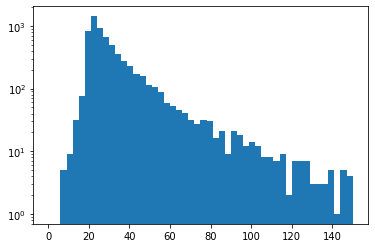

In [19]:
import matplotlib.pyplot as plt
x = [len(i) for i in sessions_df["item_id"]]
print(sum(x)/len(x))
plt.hist(x, bins=50, range=(0,150), log=True)

# 6. Evaluate quantitatively
Options are:
- **Hitrate@k**, i.e. percentage of users where top-$k$ recommendations is relevant
- **Recall@k**, i.e. percentage of top-$k$ recommendation that are relevant
- **NDCG@k**, i.e. like recall but rank of top-$k$ recommendation is weighted

Compare using relative gain, i.e. recall@10 from 10% tot 20% is a 100% gain (20-10/10 * 100)

In [20]:
import scipy.sparse

#Create scipy csr matrix
def create_sparse_matrix(sessions_df, column='train', shape=None):
  #flatten
  user_ids = []
  item_ids = []
  for idx, row in sessions_df.iterrows():
    items = row[column]
    user = row['user_id']
    user_ids.extend([user] * len(items))
    item_ids.extend(items)
  #create csr matrix
  values = np.ones(len(user_ids))
  matrix = scipy.sparse.csr_matrix((values, (user_ids, item_ids)), shape=shape, dtype=np.int32)
  return matrix


shape = (interactions_df_processed['user_id'].max() +1,  interactions_df_processed['item_id'].max() +1)
print(shape)
train_x = create_sparse_matrix(sessions_df, column='train', shape=shape)
y_true = create_sparse_matrix(sessions_df, column='test', shape=shape)
print(train_x)

(6538, 6418)
  (0, 0)	1
  (0, 66)	1
  (0, 85)	1
  (0, 340)	1
  (0, 486)	1
  (0, 582)	1
  (0, 702)	1
  (0, 1141)	1
  (0, 1214)	1
  (0, 1269)	1
  (0, 1284)	1
  (0, 1365)	1
  (0, 1404)	1
  (0, 1559)	1
  (0, 1707)	1
  (0, 1879)	1
  (0, 1982)	1
  (0, 2068)	1
  (0, 2389)	1
  (0, 2449)	1
  (0, 2533)	1
  (0, 2618)	1
  (0, 2720)	1
  (0, 3018)	1
  (0, 3082)	1
  :	:
  (6536, 3741)	1
  (6536, 4032)	1
  (6536, 4776)	1
  (6536, 4966)	1
  (6536, 5320)	1
  (6536, 5387)	1
  (6536, 5445)	1
  (6536, 5660)	1
  (6537, 2273)	1
  (6537, 2918)	1
  (6537, 3075)	1
  (6537, 3134)	1
  (6537, 3461)	1
  (6537, 3629)	1
  (6537, 3688)	1
  (6537, 4175)	1
  (6537, 4274)	1
  (6537, 4327)	1
  (6537, 4393)	1
  (6537, 4460)	1
  (6537, 4548)	1
  (6537, 4697)	1
  (6537, 4941)	1
  (6537, 5001)	1
  (6537, 5310)	1


In [21]:
#popularity recommender
class Popularity():
  def __init__(self, K=10):
    self.K = K

  def fit(self, X):
    items = list(X.nonzero()[1])
    sorted_scores = Counter(items).most_common()
    self.sorted_scores_ = [
      (item, score / sorted_scores[0][1]) for item, score in sorted_scores
    ]

  def predict(self, X):
    items, values = zip(*self.sorted_scores_[: self.K])

    users = set(X.nonzero()[0])

    U, I, V = [], [], []

    for user in users:
      U.extend([user] * self.K)
      I.extend(items)
      V.extend(values)

    score_matrix = scipy.sparse.csr_matrix((V, (U, I)), shape=X.shape)
    return score_matrix

K = 100
pop = Popularity(K=K)
pop.fit(train_x)
y_pred = pop.predict(train_x)
print(y_pred)

  (0, 1)	0.5580808080808081
  (0, 33)	0.2967171717171717
  (0, 66)	0.380050505050505
  (0, 82)	0.3851010101010101
  (0, 85)	0.5454545454545454
  (0, 122)	0.61489898989899
  (0, 138)	0.3181818181818182
  (0, 150)	0.5151515151515151
  (0, 202)	0.5492424242424242
  (0, 267)	0.30934343434343436
  (0, 285)	0.29419191919191917
  (0, 334)	0.3068181818181818
  (0, 533)	0.45075757575757575
  (0, 536)	0.2815656565656566
  (0, 625)	0.6275252525252525
  (0, 626)	0.3244949494949495
  (0, 649)	0.3409090909090909
  (0, 681)	0.38762626262626265
  (0, 687)	0.2878787878787879
  (0, 809)	0.3383838383838384
  (0, 810)	0.5391414141414141
  (0, 945)	0.4898989898989899
  (0, 957)	0.5176767676767676
  (0, 993)	0.2815656565656566
  (0, 1026)	0.40404040404040403
  :	:
  (6537, 3541)	0.2904040404040404
  (6537, 3542)	0.43308080808080807
  (6537, 3560)	0.5138888888888888
  (6537, 3616)	0.44191919191919193
  (6537, 3650)	0.553030303030303
  (6537, 3698)	0.3686868686868687
  (6537, 3791)	0.32323232323232326
  (6537

In [22]:
#Evaluate recall@k
#Do elementwise multiplication of top K predicts and true interactions
def sparse_divide_nonzero(a: scipy.sparse.csr_matrix, b: scipy.sparse.csr_matrix) -> scipy.sparse.csr_matrix:
  return a.multiply(sparse_inverse_nonzero(b))

def sparse_inverse_nonzero(a: scipy.sparse.csr_matrix) -> scipy.sparse.csr_matrix:
  inv_a = a.copy()
  inv_a.data = 1 / inv_a.data
  return inv_a

scores = scipy.sparse.lil_matrix(y_pred.shape)
scores[y_pred.multiply(y_true).astype(bool)] = 1
scores = scores.tocsr()
scores = sparse_divide_nonzero(scores, scipy.sparse.csr_matrix(y_true.sum(axis=1))).sum(axis=1)
print("recall @ {}: {:.4f}".format(K, scores.mean()))

recall @ 100: 0.0183


In [23]:
#from sklearn.metrics import ndcg_score

#ndcg = ndcg_score(y_true.toarray(), y_pred.toarray())

## Algorithm

In [24]:
from rules import Rules, Rule
from condset import Condset

In [25]:
b = Rules()
b.numrules

0

In [26]:
print(train_x)

  (0, 0)	1
  (0, 66)	1
  (0, 85)	1
  (0, 340)	1
  (0, 486)	1
  (0, 582)	1
  (0, 702)	1
  (0, 1141)	1
  (0, 1214)	1
  (0, 1269)	1
  (0, 1284)	1
  (0, 1365)	1
  (0, 1404)	1
  (0, 1559)	1
  (0, 1707)	1
  (0, 1879)	1
  (0, 1982)	1
  (0, 2068)	1
  (0, 2389)	1
  (0, 2449)	1
  (0, 2533)	1
  (0, 2618)	1
  (0, 2720)	1
  (0, 3018)	1
  (0, 3082)	1
  :	:
  (6536, 3741)	1
  (6536, 4032)	1
  (6536, 4776)	1
  (6536, 4966)	1
  (6536, 5320)	1
  (6536, 5387)	1
  (6536, 5445)	1
  (6536, 5660)	1
  (6537, 2273)	1
  (6537, 2918)	1
  (6537, 3075)	1
  (6537, 3134)	1
  (6537, 3461)	1
  (6537, 3629)	1
  (6537, 3688)	1
  (6537, 4175)	1
  (6537, 4274)	1
  (6537, 4327)	1
  (6537, 4393)	1
  (6537, 4460)	1
  (6537, 4548)	1
  (6537, 4697)	1
  (6537, 4941)	1
  (6537, 5001)	1
  (6537, 5310)	1


In [27]:
k = train_x
print(k.getcol(0))

  (0, 0)	1
  (2, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (24, 0)	1
  (32, 0)	1
  (33, 0)	1
  (34, 0)	1
  (45, 0)	1
  (50, 0)	1
  (52, 0)	1
  (63, 0)	1
  (64, 0)	1
  (78, 0)	1


In [28]:
# q = train_x.getrow(0)
# t = scipy.sparse.csc_matrix(([1, 1, 1, 1],([0, 1, 1, 1],[4830, 8609, 0, 8])), shape=(2,q.shape[1]))
# print(q.shape)
# print(q)
# print(t.shape)
# print(t)
# print("--- output ---")

# for i in range(t.shape[0]):
#     print(f"Number of items in session {i}:", t.getrow(i).nnz)
#     print(f"Number of matches for session {i}:", q.multiply(t.getrow(i)).astype(bool).sum())
    
    
# print(q.multiply(t))

In [30]:
%load_ext line_profiler

In [31]:
def freq1condset(transactions, targetItem, minsup, minconf):
    condsets = []
    consup_list = transactions.getnnz(0)
    for i in tqdm(range(transactions.shape[1])):
        condsup = consup_list[i]

        if condsup < minsup:
            continue
            
#         rulesup = 0
#         for j in range(transactions.shape[0]):
#             if transactions[j,i] and transactions[j,targetItem]:
#                 rulesup += 1
                
        tmp = scipy.sparse.csr_matrix((np.ones(len([i] + [targetItem])), (np.zeros(len([i] + [targetItem])), [i] + [targetItem])), shape=(1,transactions.shape[1]))
        rulesup = transactions.dot(tmp.transpose())
        rulesup = rulesup.multiply(rulesup == 2) 
        rulesup.eliminate_zeros()
        rulesup = rulesup.nnz
    
        if rulesup > minsup:
            if rulesup/condsup > minconf:
                c = Condset([i])
                c.condsupCount = condsup
                c.rulesupCount = rulesup
                condsets.append(c)
                
    return condsets




In [ ]:
freq_condset = freq1condset(train_x, 8, 3, 0.8)
freq_condset[0].items

In [ ]:
# i = 1
# # print(freq_condset[i].items, freq_condset[i].condsupCount)
# print(freq_condset[i].items, freq_condset[i].condsupCount, freq_condset[i].rulesupCount)

In [ ]:
%lprun -f freq1condset freq1condset(train_x.transpose(), 8, 20, 0.0)

In [32]:
def genRules(condsets, targetItem, maxNumrules, minsup, minconf):
    R = Rules()
    for condset in condsets:
        if condset.rulesupCount > minsup:
            if condset.rulesupCount/condset.condsupCount > minconf:
                R.rules.append(Rule(condset, targetItem))
                if len(R) >= maxNumrules:
                    R.aboveMaxRulenumFlag = True
                    return R
    
    return R

In [33]:
"""
(145), (247) -> (1245) (1457) (1247) (2457)
"""

def candidateGEN(Fk):
    candidate_conds = []
    
    for i in range(len(Fk)):
        for j in range(i+1, len(Fk)):
            item_i = Fk[i].items
            item_j = Fk[j].items

            if item_i[:-1] == item_j[:-1]:
                new_condset = item_i + [item_j[-1]]
                candidate_conds.append(Condset(new_condset))
                
    return candidate_conds

In [34]:
def condsetsInt(condsets, transaction, transactions):
    # loop over condsets
    # if condset in transaction, store condset in list
    conds_in_t = []
    
#     for c in condsets:
#         for i in c.items:
#             if not transactions[transaction, i]:
#                 break
#             conds_in_t.append(c)
    
    if len(condsets) > 0:
        t = transactions.getrow(transaction).toarray()
        for c in condsets:
            if c in t:
                conds_in_t.append(c)
            
    return conds_in_t
    

In [35]:
def frequentConds(Ck, minsup):
    return list(filter(lambda x: x.rulesupCount > minsup, Ck))

In [36]:
def maxNumrulesWithSup(maxNumrules, R, R1, minNumRules):
    r = R.rules + R1.rules
    r.sort(key=lambda x: x.lhs.rulesupCount)
        
    new_R = Rules()
    new_R.rules = r
    
    if len(new_R) > maxNumrules:
        new_R.aboveMaxRulenumFlag = True
    elif len(new_R) < minNumRules:
        new_R.belowMinNumrulesFlag = True
    return new_R

In [37]:
def setMinsupportCount(transactions, targetItem):
    pass

In [38]:
def ASARM2(T, targetItem, minConf, minNumRules, maxNumRules, minsupCount):
    F1 = freq1condset(T, targetItem, minsupCount, minConf)
    R = genRules(F1, targetItem, maxNumRules, minsupCount, minConf)
    
    k = 2
    Fk = F1

    print("len Fk:", len(Fk))
    
    while len(Fk) > 0 and not R.aboveMaxRulenumFlag:
        Ck = candidateGEN(Fk)
        for t in tqdm(range(T.shape[0])):
            Ct = condsetsInt(Ck, t, T)
#             print(len(Ct))
            
            for c in Ct:
                c.condsupCount += 1
                if T[t, targetItem]:
                    c.rulesupCount += 1
        
        Fk = frequentConds(Ck, minsupCount)
        R1 = genRules(Fk, targetItem, maxNumRules, minsupCount, minConf)
        if R.numrules + R1.numrules > maxNumRules or R1.aboveMaxRulenumFlag:
            R.aboveMaxRulenumFlag = True
        R = maxNumrulesWithSup(maxNumRules, R, R1, minNumRules)
        
        k += 1
    
    if R.numrules < minNumRules:
        R.belowMinNumrulesFlag = True
    
    return R

In [39]:
def ASARM1(T, targetItem, minConf, minNumrules, maxNumrules):
#     minsupportCount = setMinsupportCount(T, targetItem)
    minsupportCount = 2

    R = ASARM2(T, targetItem, minConf, minNumrules, maxNumrules, minsupportCount)
    while R.aboveMaxRulenumFlag or R.belowMinNumrulesFlag:
        print(len(R), "rules generated")
        print(minsupportCount)
        if R.aboveMaxRulenumFlag:
            if minsupportCount == T.shape[0]:
                return R.rules
            minsupportCount += 1
            R1 = R
            R = ASARM2(T, targetItem, minConf, minNumrules, maxNumrules, minsupportCount)
            if R.belowMinNumrulesFlag:
                return maxNumrulesWithSup(maxNumrules, R, R1, minNumrules).rules
        else:
            if minsupportCount == 0:
                return R.rules
            minsupportCount -= 1
            R1 = R
            R = ASARM2(T, targetItem, minConf, minNumrules, maxNumrules, minsupportCount)
            if R.aboveMaxRulenumFlag:
                return maxNumrulesWithSup(maxNumrules, R, R1, minNumrules).rules
            
    return R.rules
            

In [47]:
%%time
r = ASARM1(train_x, 893, 0.4, 20, 200)

100%|█████████████████████████████████████| 6418/6418 [00:06<00:00, 1065.51it/s]


len Fk: 2


100%|█████████████████████████████████████| 6538/6538 [00:00<00:00, 9416.34it/s]


2 rules generated
2


100%|██████████████████████████████████████| 6418/6418 [00:06<00:00, 998.07it/s]


len Fk: 5


100%|█████████████████████████████████████| 6538/6538 [00:03<00:00, 2016.80it/s]


5 rules generated
1


100%|██████████████████████████████████████| 6418/6418 [00:06<00:00, 934.02it/s]


len Fk: 24


100%|███████████████████████████████████████| 6538/6538 [01:19<00:00, 82.08it/s]

CPU times: user 1min 44s, sys: 2.7 s, total: 1min 46s
Wall time: 1min 42s


In [ ]:
%lprun -f ASARM2 ASARM1(train_x.transpose(), 18, 0.4, 20, 200)

In [48]:
for rule in r:
    print(rule.lhs.items, "->", rule.rhs, "|", rule.lhs.rulesupCount, "-", rule.lhs.rulesupCount / rule.lhs.condsupCount)

[414] -> 893 | 1 - 0.5
[473] -> 893 | 1 - 0.5
[619] -> 893 | 1 - 0.5
[658] -> 893 | 1 - 1.0
[1927] -> 893 | 1 - 0.5
[2691] -> 893 | 1 - 1.0
[2922] -> 893 | 1 - 0.5
[3120] -> 893 | 1 - 0.5
[3397] -> 893 | 1 - 0.5
[3755] -> 893 | 1 - 0.5
[4394] -> 893 | 1 - 0.5
[4632] -> 893 | 1 - 0.5
[4635] -> 893 | 1 - 0.5
[5190] -> 893 | 1 - 0.5
[5198] -> 893 | 1 - 0.5
[5200] -> 893 | 1 - 0.5
[5377] -> 893 | 1 - 0.5
[5453] -> 893 | 1 - 1.0
[5833] -> 893 | 1 - 0.5
[3764] -> 893 | 2 - 1.0
[4536] -> 893 | 2 - 0.5
[5115] -> 893 | 2 - 0.6666666666666666
[3920] -> 893 | 3 - 0.42857142857142855
[893] -> 893 | 37 - 1.0


In [51]:
train_x.shape

(6538, 6418)

In [43]:
%%time
count = 0
for i in range(train_x.shape[1]):
    if train_x[0, i]:
        count += 1
print(count)

33
CPU times: user 133 ms, sys: 16.2 ms, total: 149 ms
Wall time: 121 ms


In [50]:
%%time
print(train_x.getrow(0).nnz)

33
CPU times: user 894 µs, sys: 23 µs, total: 917 µs
Wall time: 762 µs


In [ ]:
values = []
for i in tqdm(range(train_x.shape[1])):
    values.append(train_x[:,i].nnz)

In [ ]:
sum(values)/len(values)